In [38]:
import numpy as np
import itertools
import tqdm

from dredFISH.Utils.__init__plots import *
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
N = np.math.factorial(18)/(np.math.factorial(4)*np.math.factorial(14))
N = int(N)
N

3060

In [3]:
allcodes = np.asarray(list(itertools.combinations(range(18),4)))
len(allcodes), allcodes[:10]

(3060,
 array([[ 0,  1,  2,  3],
        [ 0,  1,  2,  4],
        [ 0,  1,  2,  5],
        [ 0,  1,  2,  6],
        [ 0,  1,  2,  7],
        [ 0,  1,  2,  8],
        [ 0,  1,  2,  9],
        [ 0,  1,  2, 10],
        [ 0,  1,  2, 11],
        [ 0,  1,  2, 12]]))

In [4]:
allcodes_b = np.zeros((len(allcodes), 18), dtype=int)
for i, code in enumerate(allcodes):
    allcodes_b[i,code] = 1
allcodes_b.shape

(3060, 18)

In [5]:
remained = np.zeros((1,18),dtype=int)
for code in allcodes_b:
    cond = np.any(np.sum(code.reshape(1,-1) != remained, axis=1) < 4)
    if cond:
        continue
    else:
        remained = np.vstack([remained, code])
n = len(remained[1:])
n

148

In [6]:
def one_round(allcodes_b, idx):
    remained = np.zeros((1,18),dtype=int)
    for code in allcodes_b[idx]:
        cond = np.any(np.sum(code.reshape(1,-1) != remained, axis=1) < 4)
        if cond:
            continue
        else:
            remained = np.vstack([remained, code])
    n = len(remained[1:])
    return n

In [9]:
one_round(allcodes_b, np.arange(N))

148

In [13]:
res = []

In [42]:
for i in tqdm.tqdm(range(1000)):
    a = one_round(allcodes_b, np.random.permutation(N))
    res.append(a)

100%|██████████| 1000/1000 [02:10<00:00,  7.65it/s]


In [43]:
len(res), np.max(res)

(1300, 159)

/home/fangming/anaconda3/envs/mymerfish/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


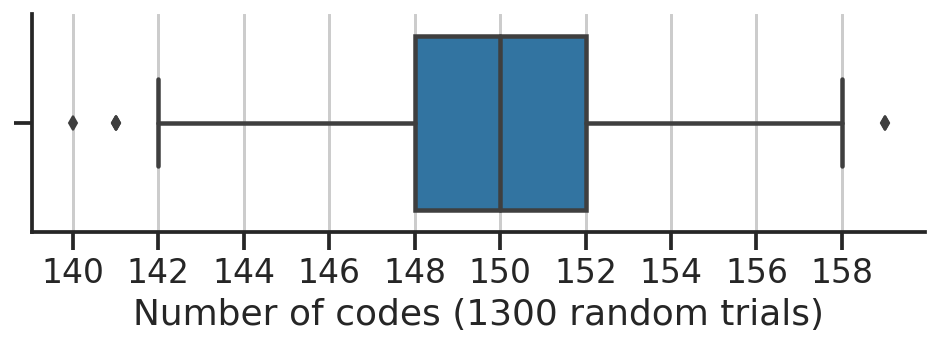

In [44]:
fig, ax = plt.subplots(figsize=(8,2))
sns.boxplot(res, ax=ax)
sns.despine(ax=ax)
ax.set_xticks(np.arange(np.min(res), np.max(res)+1, 2))
ax.set_xlabel(f'Number of codes ({len(res)} random trials)')
plt.show()